In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

In [113]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [114]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.size

3887

In [5]:
df.shape

(299, 13)

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# 1. What is the distribution of age among heart failure patients in the dataset

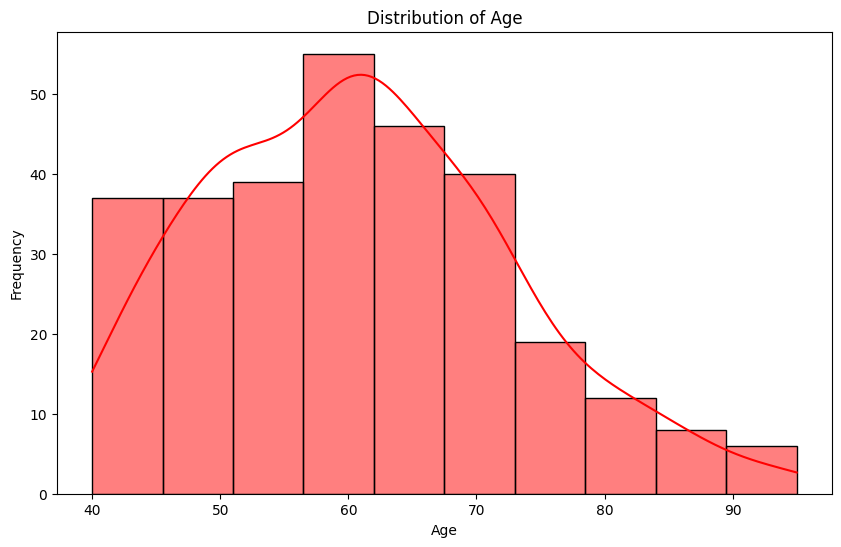

In [78]:
plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde=True,color = 'red')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Insights of Above plot:
1. mostly people belong to 40 - 80 age group
2. there are least amount of people with 90 age

# 2. How does the death rate vary with age ?

In [9]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

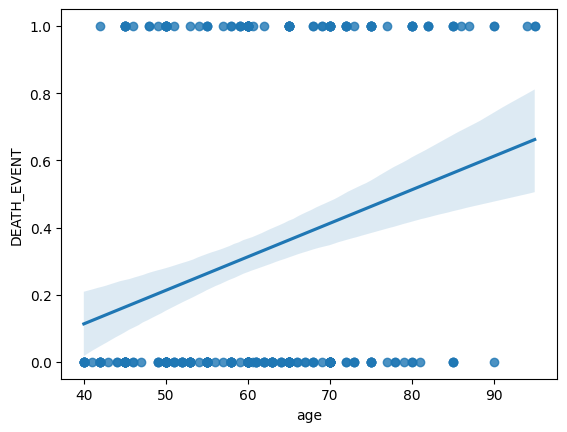

In [10]:
sns.regplot(x = 'age',y = 'DEATH_EVENT',data = df)

# Insights of above plot:
1. here age is directly proportional to death event means when age is increase death events is also increase.
2. maximum death event is the age of 90 or above 90

# 3. What is the percentange of male and female patients in the datasets?

In [92]:
df['sex'].value_counts(normalize=True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

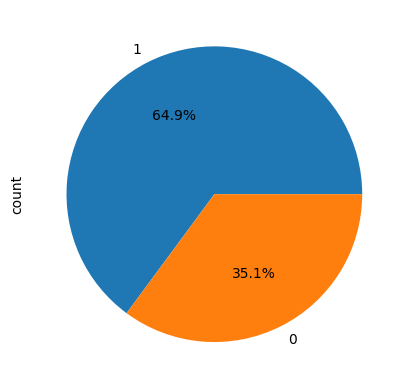

In [93]:
df['sex'] = df['sex'].value_counts().plot.pie(autopct = '%1.1f%%')

Insights of above plot:
1. here 0 for female and 1 for male
2. male percentage is higher than female percentage
3. Percentage female is 35.5% and percentage of male is 64.4%

# 4. How does the platelet count vary among different age groups

In [94]:
# check the data type of age column
df['age'].dtype

dtype('float64')

In [95]:
df['platelets'].dtype

dtype('float64')

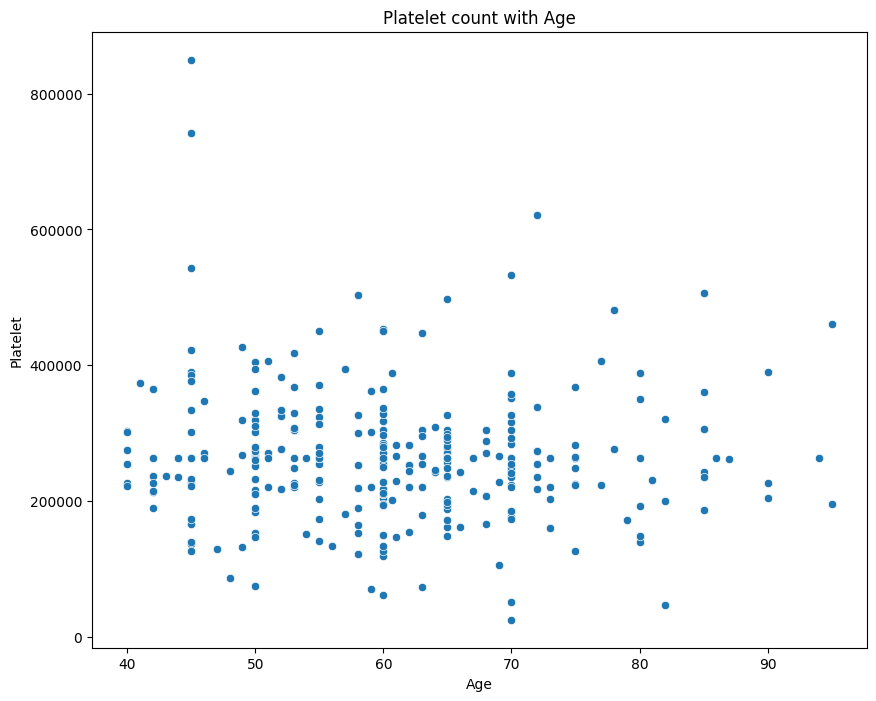

In [96]:
plt.figure(figsize= (10,8))
sns.scatterplot(data=df,x='age',y='platelets')
plt.title("Platelet count with Age")
plt.xlabel('Age')
plt.ylabel('Platelet')
plt.show()

Insights:
1. High density platelets count belong to 40 t0 75 age group
2. maximum platelet count  800000 and his age between 40 to 45
3. minimum platelet count is very low his person age is 70
4. maximum platelet count lie b/w 200000 to 400000

In [97]:
df.columns
# see the all column of dataset

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# 5. Is there a correlation between creatinine and sodium levels in the blood

In [111]:
df['serum_creatinine'].corr(df['serum_sodium'])

-0.18909521009117414

<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

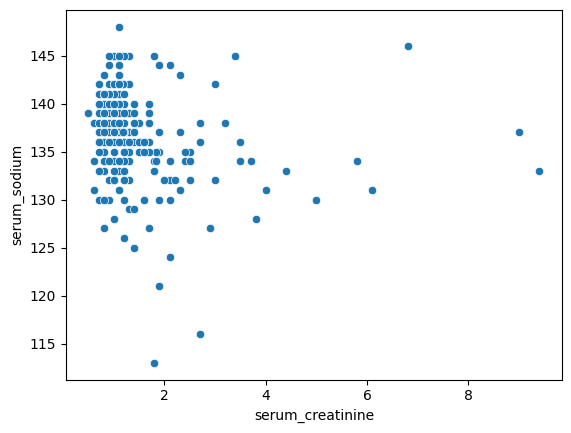

In [110]:
sns.scatterplot(data=df,x='serum_creatinine',y = 'serum_sodium')

<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

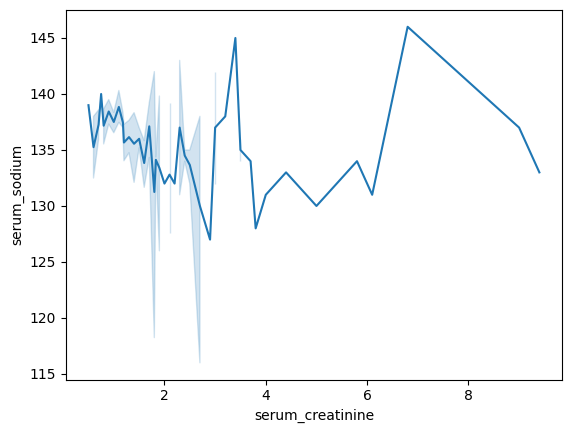

In [34]:
sns.lineplot(data=df,x='serum_creatinine',y = 'serum_sodium')

# insights of above plots:
1. sodium level lie between 127 to 145
2. it show the negative correlation means 

# 6. How does the prevalence of high blood pressure differ between male and female patients

In [34]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='count'>

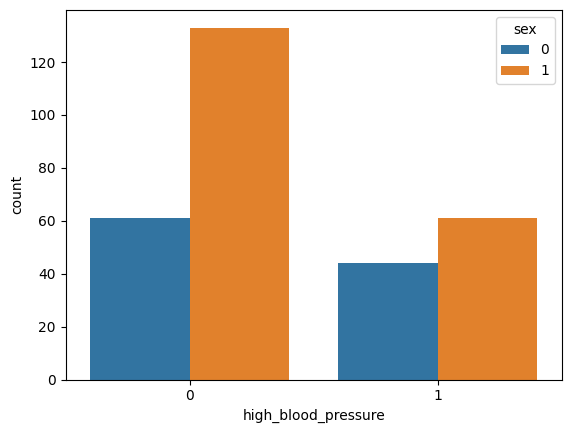

In [35]:
sns.countplot(x='high_blood_pressure' , data =df,hue = 'sex')

# insights of above plot:
. 0 for female and 1 for male in sex and 
. 0 no for high_blood_pressure and 1 for high_blood_pressure
1. man has high blood pressure comapare then female
2. offcourse there are some difference in both 
3. difference for no high blood pressure between male and female is 125 - 60 =65
4. difference for HDP b/w male and female is 60 -40 = 20

# 7 What is the relationship between smoking habits and the occurrence of heart failure ?

In [36]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [40]:
df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [43]:
df[['smoking', 'DEATH_EVENT']].corr()

,smoking,DEATH_EVENT
smoking,1.000000,-0.012623
DEATH_EVENT,-0.012623,1.000000


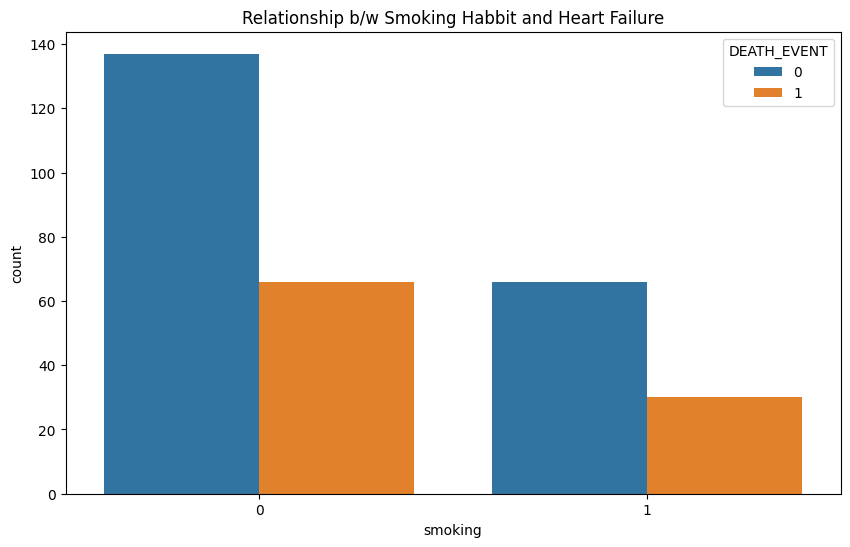

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='smoking',hue='DEATH_EVENT')
plt.title("Relationship b/w Smoking Habbit and Heart Failure")
plt.show()

Insights: 
1. if Smoking habbit no(0) then number of death event is 60 due other causes
2. if Smoking habbit yes(1) then number of death event is 30 due to heart failure problem

# 8. Are there any noticeable patterns in the distribution of death events across different age groups

<Axes: xlabel='age', ylabel='count'>

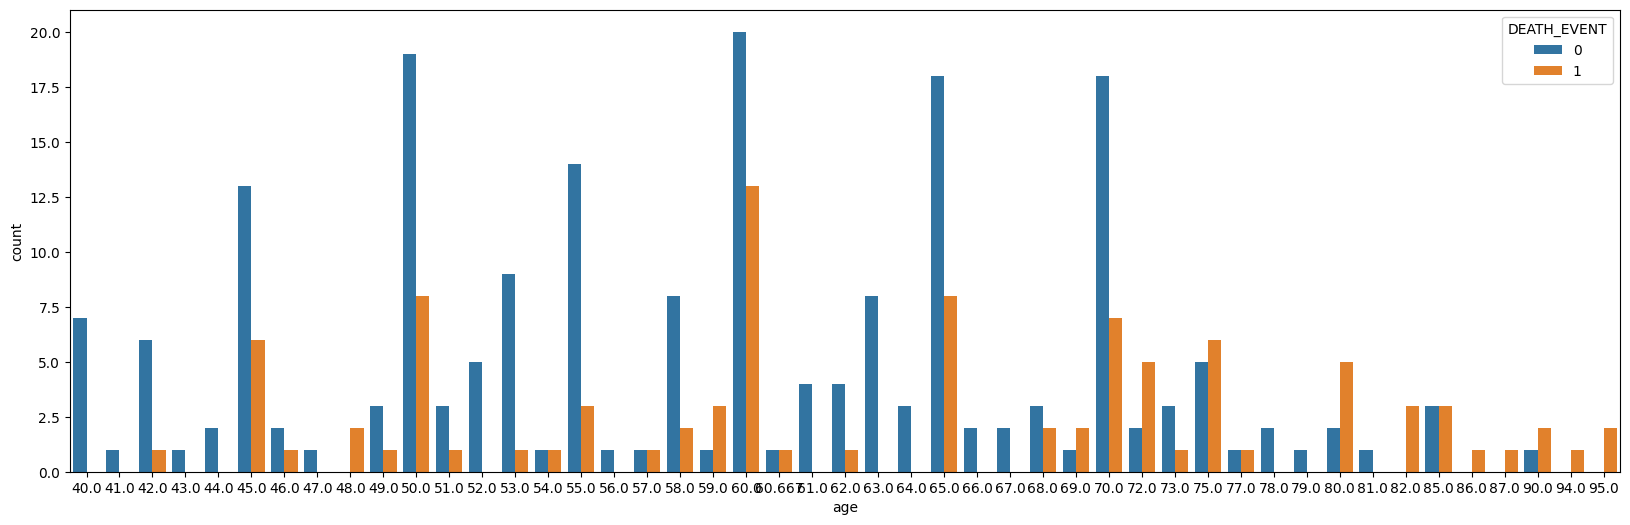

In [37]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='age',hue='DEATH_EVENT')

# insights of above plot:
1. maximum death event is happened in age of 60
2. minimum death event is happened in age of 42


# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

<Axes: xlabel='ejection_fraction', ylabel='count'>

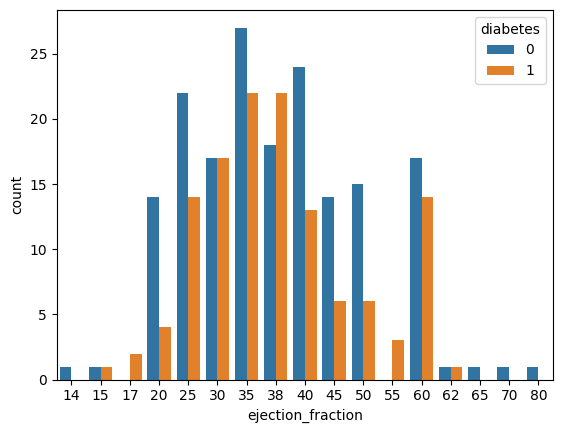

In [57]:
sns.countplot(data=df,hue='diabetes',x='ejection_fraction')

# insights of above plot
1. minimum difference in ejection fraction b/w without diabetes and with diabetes is 0
2. maximum difference in ejection fraction b/w without diabetes and with diabetes is 14 - 3 = 11 
3. there are little differences in both

# 10. How does the serum creatinine level vary between patients who survived and those who did not ?

<Axes: xlabel='serum_creatinine', ylabel='count'>

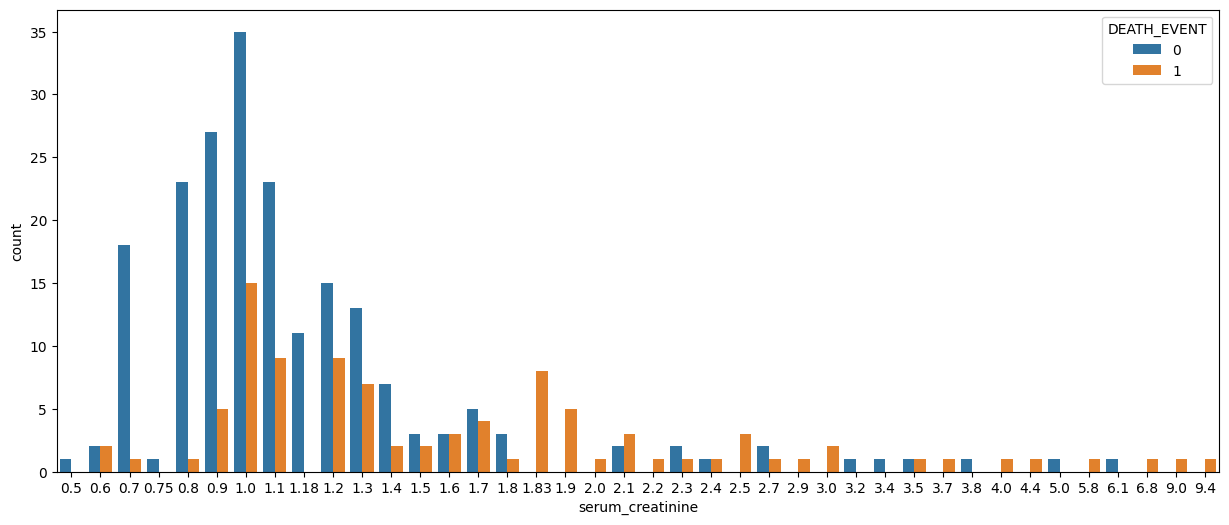

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x ='serum_creatinine',hue = 'DEATH_EVENT' )

# insights of above plot:
1. when creatinine level is 0.8 this time maximum people has survivied
2. at creatitnine level 1.83 ,1.9 and 2.0 of anyone has not survivied
3. when creatinine level is increasing then survivied rate and not survivied rate constant